In [1]:
import networkx as nx
%matplotlib inline

nx.__version__

'2.8.7'

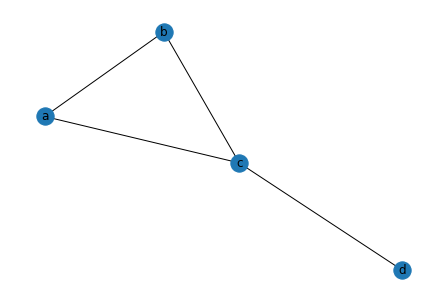

In [2]:
# a "plain" graph is undirected
G = nx.Graph()

# give each a node a 'name', which is a letter in this case.
G.add_node('a')

# the add_nodes_from method allows adding nodes from a sequence, in this case a list
nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from(nodes_to_add)

# add edge from 'a' to 'b'
# since this graph is undirected, the order doesn't matter here
G.add_edge('a', 'b')

# just like add_nodes_from, we can add edges from a sequence
# edges should be specified as 2-tuples
edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

# draw the graph
nx.draw(G, with_labels = True)

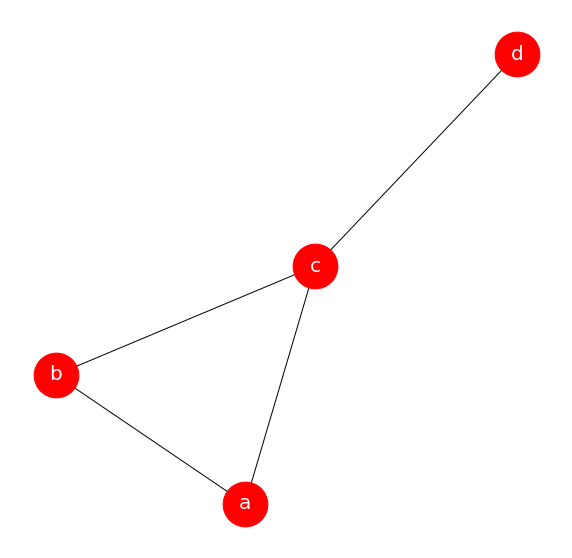

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize = (10, 10))
nx.draw(G,
        with_labels = True,
        node_color = 'red',
        node_size = 2000,
        font_color = 'white',
        font_size = 20,
        ax = ax        
)

In [4]:
print("Nodes: ",G.nodes(),"\n")
print("Edges: ",G.edges(),"\n")

print("-------------NODES-------------")
for node in G.nodes:
    print(node)
print("\n-------------EDGES-------------")
for edge in G.edges:
    print(edge)

print("\n-------------NUMBER OF NODES-------------")
print(G.number_of_nodes())
print("\n-------------NUMBER OF EDGES-------------")
print(G.number_of_edges())
print("\n-------------NEIGHBORHORS OF B-------------")
for neighbor in G.neighbors('b'):
    print(neighbor)

print("\nOr use list:", list(G.neighbors('b')))

Nodes:  ['a', 'b', 'c', 'd'] 

Edges:  [('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')] 

-------------NODES-------------
a
b
c
d

-------------EDGES-------------
('a', 'b')
('a', 'c')
('b', 'c')
('c', 'd')

-------------NUMBER OF NODES-------------
4

-------------NUMBER OF EDGES-------------
4

-------------NEIGHBORHORS OF B-------------
a
c

Or use list: ['a', 'c']


In [5]:
print("The graph is a tree? ",nx.is_tree(G),"\n")
print("The graph is connected? ",nx.is_connected(G))

The graph is a tree?  False 

The graph is connected?  True


In [6]:
print("G has node a? ",G.has_node('a'),"\n")
print("G has node x? ", G.has_node('x'),"\n")
print("\'d\' in G.nodes? ",('d' in G.nodes))
print("G has edge (a,b)?", G.has_edge('a','b'))
print("\'(x,y) in G.nodes?\'", (('x','y') in G.edges))


G has node a?  True 

G has node x?  False 

'd' in G.nodes?  True
G has edge (a,b)? True
'(x,y) in G.nodes?' False


In [7]:
print("How many neighbors has the node a?", len(list(G.neighbors('a'))),"\n")
print("In a shorter way: ", G.degree('a'))

How many neighbors has the node a? 2 

In a shorter way:  2


# Exercise One

Often in the context of trees, a node with degree 1 is called a leaf. Write a function named get_leaves that takes a graph as an argument, loops through the nodes, and returns a list of nodes with degree 1.

In [8]:
def get_leaves(G):
    leafs = []
    for node in G.nodes:
        if G.degree(node) == 1:
            leafs.append(node)
    return leafs

In [9]:
G = nx.Graph()
G.add_edges_from([
        ('a', 'b'),
        ('a', 'd'),
        ('c', 'd'),
    ])
assert set(get_leaves(G)) == {'c', 'b'}

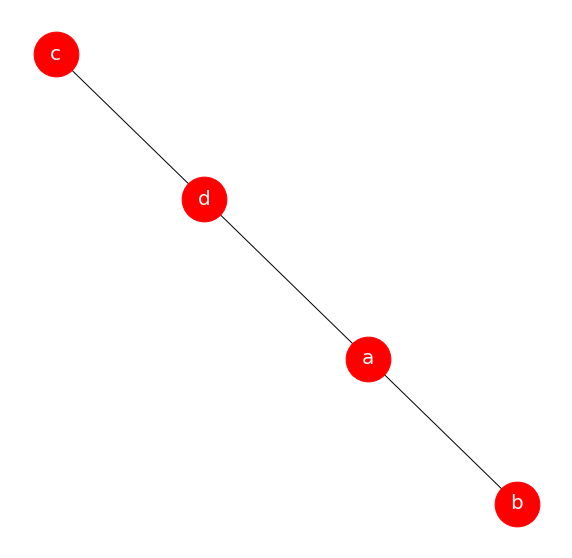

In [10]:
fig, ax = plt.subplots(1,1, figsize = (10, 10))
nx.draw(G,
        with_labels = True,
        node_color = 'red',
        node_size = 2000,
        font_color = 'white',
        font_size = 20,
        ax = ax        
)

# Aside: comprehensions
Often we have one sequence of values and we want to generate a new sequence by applying an operation to each item in the first. List comprehensions and generator expressions are compact ways to do this.

List comprehensions are specified inside square brackets, and immediately produce a list of the result.

In [11]:
items = ['spider', 'y', 'banana']
[item.upper() for item in items]

['SPIDER', 'Y', 'BANANA']

In the context of NetworkX, this is often used to do something with the node or edge lists:

In [12]:
print(G.nodes())
print([G.degree(n) for n in G.nodes()])

['a', 'b', 'd', 'c']
[2, 1, 2, 1]


Generator expressions are slightly different as they are evaluated lazily. These are specified using round braces, and if they are being expressed as a function argument, they can be specified without any braces. These are most often used in the context of aggregations like the max function:

In [13]:
g = (len(item) for item in items)
list(g)

[6, 1, 6]

In [14]:
max(len(item) for item in items)

6

In [15]:
sorted(item.upper() for item in items)

['BANANA', 'SPIDER', 'Y']

# Node names
The node names don't have to be single characters -- they can be strings or integers or any immutable object, and the types can be mixed. The example below uses strings and integers for names.

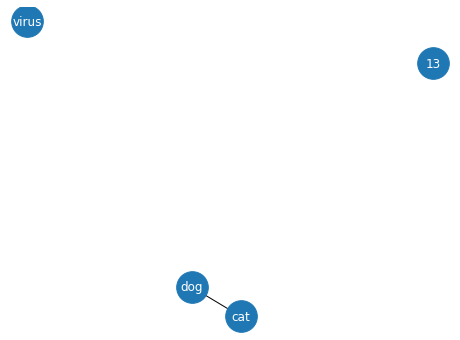

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(8,6))

G = nx.Graph()
G.add_nodes_from(['cat','dog','virus',13])
G.add_edge('cat','dog')
nx.draw(G, with_labels=True, font_color='white', node_size=1000, ax = ax)
plt.show()

# Adjacency lists

One compact way to represent a graph is an adjacency list. This is most useful for unweighted graphs, directed or undirected. In an adjacency list, each line contains some number of node names. The first node name is the "source" and each other node name on the line is a "target". For instance, given the following adjacency list:

a d e

b c

c

d

e

the edges are as follows:

(a, d)

(a, e)

(b, c)

The nodes on their own line exist so that we are sure to include any singleton nodes. Note that if our graph is undirected, we only need to specify one direction for each edge. Importantly, whether the graph is directed or undirected is often not contained in the file itself -- you have to infer it. This is one limitation of the format.

There is a file called `friends.adjlist`. It's a plain text file, so you can open it on your computer or in GitHub, but here are its contents:

In [17]:
print(open('friends.adjlist').read())

George Frank Dennis
Dennis Claire Esther
Claire Frank Alice Esther
Bob Alice
Frank Alice
Alice
Esther
Shelly


NetworkX provides a way to read a graph from an adjacency list: nx.read_adjlist(). We will name this graph SG, for social graph.

In [18]:
SG = nx.read_adjlist('friends.adjlist')

We know how to draw this graph:

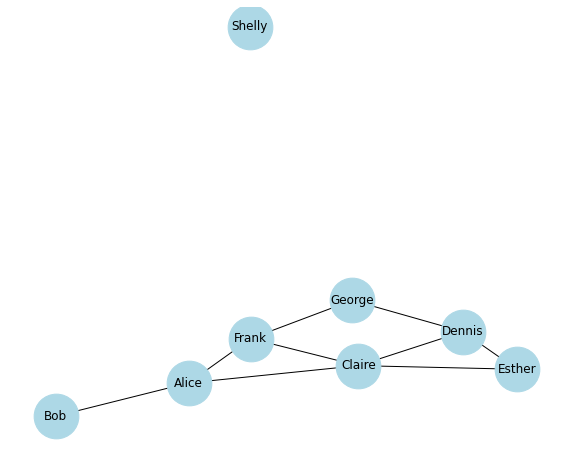

In [19]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
nx.draw(SG, node_size=2000, node_color='lightblue', with_labels=True,ax=ax)
plt.show()

And we know how to get information such as the number of friends linked from a node:

In [20]:
SG.degree('Alice')

3

# EXERCISE 2
Write a function max_degree that takes a graph as its argument, and returns a 2-tuple with the name and degree of the node with highest degree.

In [21]:
def max_degree(G):
    maxDegree = G.degree((list(G.nodes()))[0])
    for node in G.nodes:
        if(G.degree(node) >= maxDegree):
            maxDegree = G.degree(node)
            maxDegreeNode = node
    
    return (maxDegreeNode, maxDegree)


In [22]:
SG = nx.read_adjlist('friends.adjlist')
assert max_degree(SG) == ('Claire', 4)

# EXERCISE 3

Write a function `mutual_friends` that takes a graph and two nodes as arguments, and returns a list (or set) of nodes that are linked to both given nodes. For example, in the graph `SG` drawn above,

mutual_friends(SG, 'Alice', 'Claire') == ['Frank']

an empty list or set should be returned in the case where two nodes have no mutual friends, e.g. George and Bob in `SG` drawn above.

In [23]:
def mutual_friends(G, node_1, node_2):
  x = set(G.neighbors(node_1))
  y = set(G.neighbors(node_2))
  mutual = x.intersection(y)

  return list(mutual)

In [24]:
SG = nx.read_adjlist('friends.adjlist')

assert mutual_friends(SG, 'Alice', 'Claire') == ['Frank']
assert mutual_friends(SG, 'George', 'Bob') == []
assert sorted(mutual_friends(SG, 'Claire', 'George')) == ['Dennis', 'Frank']

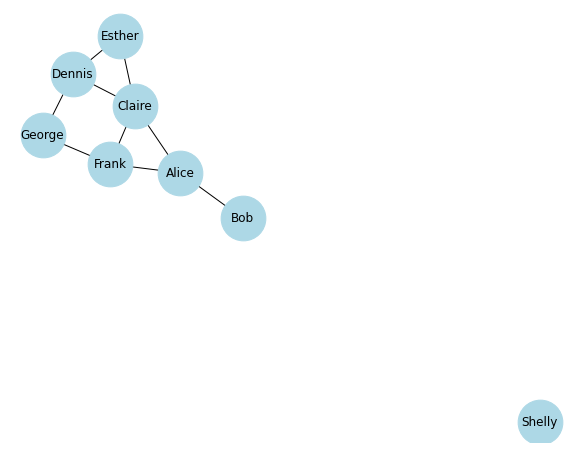

In [25]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
nx.draw(SG, node_size=2000, node_color='lightblue', with_labels=True,ax=ax)
plt.show()

# Directed graphs

Unless otherwise specified, we assume graph edges are undirected -- they are symmetric and go both ways. But some relationships, e.g. predator-prey relationships, are asymmetric and best represented as directed graphs. NetworkX provides the `DiGraph` class for directed graphs.

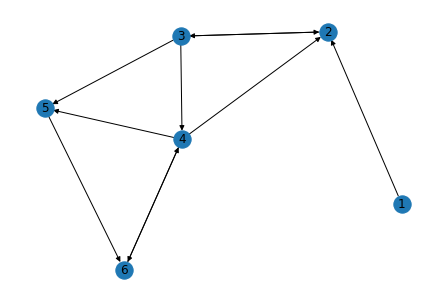

In [26]:
D = nx.DiGraph()

D.add_edges_from([(1,2),(2,3),(3,2),(3,4),(3,5),(4,5),(4,6),(5,6),(6,4),(4,2)])

nx.draw(D, with_labels=True)

Note the asymmetry in graph methods dealing with edges such as `has_edge()`:

In [27]:
print(D.has_edge(1,2))
print(D.has_edge(2,1))

True
False


Instead of the symmetric relationship "neighbors", nodes in directed graphs have predecessors ("in-neighbors") and successors ("out-neighbors"):

In [28]:
print('Successors of 2:', list(D.successors(2)))

print('Predecessors of 2:', list(D.predecessors(2)))

Successors of 2: [3]
Predecessors of 2: [1, 3, 4]


Directed graphs have in-degree and out-degree, giving the number of edges pointing to and from the given node, respectively:

In [29]:
print(D.in_degree(2))
print(D.out_degree(2))

3
1


# Caveat
Since NetworkX 2, the `.degree()` method on a directed graph gives the total degree: in-degree plus out-degree. However, in a bit of confusing nomenclature, the `neighbors` method is a synonym for `successors`, giving only the edges originating from the given node. This makes sense if you consider `neighbors` to be all the nodes reachable from the given node by following links, but it's easy to make the mistake of writing `.neighbors()` in your code when you really want both predecessors and successors.

In [30]:
D.degree(2)

4

In [31]:
print('Successors of 2:', list(D.successors(2)))
print('"Neighbors" of 2:', list(D.neighbors(2)))

Successors of 2: [3]
"Neighbors" of 2: [3]
